# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_tbl =  soup.find_all('tr', class_ = 'data-row')
mars_tbl

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_temp_tbl = []
# Loop through the scraped data to create a list of rows
for record in mars_tbl:
   
    # Find all data for each column
    columns = record.find_all('td')
    
    if(columns != []):
        id = columns[0].text.strip()
        terrestrial_date = columns[1].text.strip()
        sol = columns[2].text.strip()
        ls = columns[3].text.strip()
        month = columns[4].text.strip()
        min_temp = columns[5].text.strip()     
        pressure = columns[6].text.strip()

# Store each title and preview pair in a dictionary
    mars_tbl_dict = {"id" : id,
        "terrestrial_date": terrestrial_date,
        "sol": sol,
        "ls" : ls,
        "month" : month,
        "min_temp" : min_temp,     
        "pressure" : pressure
        }
# Add the dictionary to the list
    mars_temp_tbl.append(mars_tbl_dict)
mars_temp_tbl

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(mars_temp_tbl)
   

In [8]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
data_type = mars_temp_df.dtypes
data_type

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_temp_df["terrestrial_date"] = pd.to_datetime(mars_temp_df["terrestrial_date"],  format = '%Y-%m-%d')
mars_temp_df["sol"] = mars_temp_df["sol"].astype(int)
mars_temp_df["ls"] = mars_temp_df["ls"].astype(int)
mars_temp_df["month"] = mars_temp_df["month"].astype(int)
mars_temp_df["min_temp"] = mars_temp_df["min_temp"].astype(float)
mars_temp_df["pressure"] = mars_temp_df["pressure"].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
data_type = mars_temp_df.dtypes
data_type

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = mars_temp_df.groupby(['month'])['month'].count()
num_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
mar_days = num_months.sum()
mar_days

1867

In [14]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_temp_df.groupby(['month'])['min_temp'].mean()
avg_low_temp_df = pd.DataFrame(avg_low_temp)

avg_low_temp_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0, 0.5, 'Month')

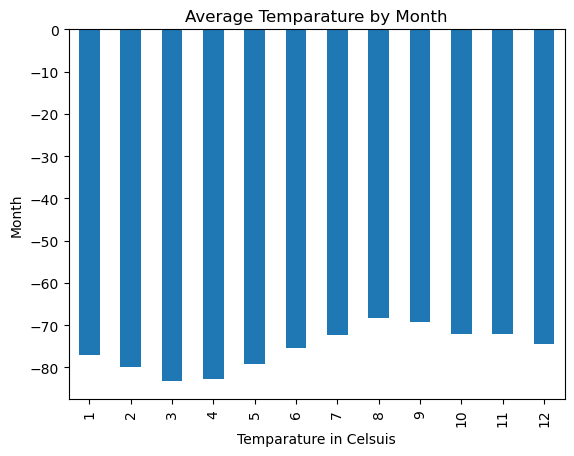

In [15]:
# Plot the average temperature by month
avg_low_temp.plot(kind="bar")
plt.title("Average Temparature by Month")
plt.xlabel("Temparature in Celsuis")
plt.ylabel("Month")

In [16]:
# Identify the coldest and hottest months in Curiosity's location
coldest_temp = avg_low_temp_df.min()
print("#####################################################################")
print(f"Coldest temperature {coldest_temp}")
print("#####################################################################")
hottest_temp = avg_low_temp_df.max()
print("#####################################################################")
print(f"Hottest temperature {hottest_temp}")
print("#####################################################################")
      

#####################################################################
Coldest temperature min_temp   -83.307292
dtype: float64
#####################################################################
#####################################################################
Hottest temperature min_temp   -68.382979
dtype: float64
#####################################################################


In [17]:
cold_mnth = avg_low_temp_df.loc[avg_low_temp_df['min_temp'] == -83.30729166666667]
print("#####################################################################")
print(f"Coldest Month: \n {cold_mnth}")
print("#####################################################################")
hot_mnth =  avg_low_temp_df.loc[avg_low_temp_df['min_temp'] == -68.38297872340425]
print("#####################################################################")
print(f"Hottest Month: \n {hot_mnth}")
print("#####################################################################")

#####################################################################
Coldest Month: 
         min_temp
month           
3     -83.307292
#####################################################################
#####################################################################
Hottest Month: 
         min_temp
month           
8     -68.382979
#####################################################################


In [18]:
# 4. Average pressure by Martian month
avg_pressure = mars_temp_df.groupby(['month'])['pressure'].mean()
avg_pressure_df = pd.DataFrame(avg_pressure)
avg_pressure_df = avg_pressure_df.reset_index()
avg_pressure_df


,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [19]:
# Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
low_pres = avg_pressure_df['pressure'].min()
print("#####################################################################")
print(f"Coldest pressure: \n {low_pres}")
print("#####################################################################")
high_pres = avg_pressure_df['pressure'].max()
print("#####################################################################")
print(f"Hottest pressure: \n {high_pres}")
print("#####################################################################")



#####################################################################
Coldest pressure: 
 745.0544217687075
#####################################################################
#####################################################################
Hottest pressure: 
 913.3059701492538
#####################################################################


In [20]:
low_mnth1 = avg_pressure_df.loc[avg_pressure_df['pressure'] == 745.0544217687075,'month'].iloc[0]
print("#####################################################################")
print(f"Lowest pressure Month: \n   {low_mnth1}")
print("#####################################################################")
high_mnth1 =  avg_pressure_df.loc[avg_pressure_df['pressure'] == 913.3059701492538,'month'].iloc[0]
print("#####################################################################")
print(f"Highest pressure Month: \n   {high_mnth1}")
print("#####################################################################")


#####################################################################
Lowest pressure Month: 
   6
#####################################################################
#####################################################################
Highest pressure Month: 
   9
#####################################################################


Text(0, 0.5, 'Atmospheric Pressure')

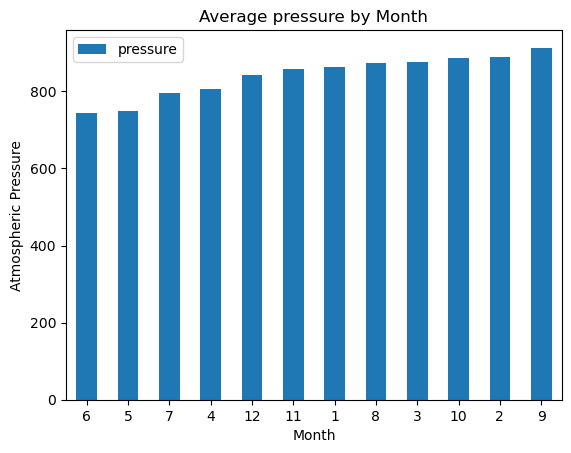

In [21]:
# Plot the average pressure by month
avg_pressure_df.sort_values('pressure', ascending=True).plot.bar(x='month', y='pressure', rot=0);

plt.title("Average pressure by Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

Text(0, 0.5, 'Minimum Temparature')

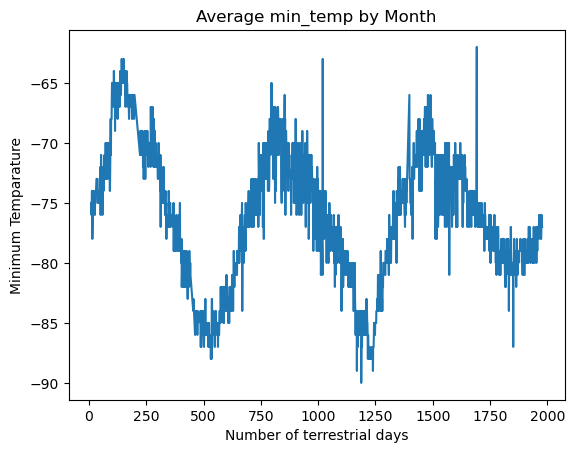

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
### There are 687 Earth days (terrestrial) in a Martian year

martin_days = mars_temp_df.groupby(['sol'])['min_temp'].mean()
martin_days_df = pd.DataFrame(martin_days)
#martin_days_df
martin_days_df['min_temp'].plot()
plt.title("Average min_temp by Month")
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temparature")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
from pathlib import Path
  
filepath = Path("output/mars_temp.csv")  
martin_days_df.to_csv(filepath) 
 

In [24]:
browser.quit()